# Determines the Electronic charge density along Z axis.


#### path = "............" refers to the path of the dump file from which data is to be extracted

#### frames = ------ number of frames during openmd execution

#### atomNumber = ----------- total number of atomic sites during program execution

#### atomPlate= ................ number of atoms in capacitave plates

In [87]:
# extract information from dump file.
import numpy as num
import matplotlib.pyplot as plt
import pylab as lab
from scipy import constants
import scipy as sci
import pandas as pan

from random import randint


%matplotlib inline

#==================================================================================================================
pathFolder="/home/hbhattar/afs/Hemanta/metals/TestDensity/lat4Vacuum.dump"
#the path of the file
path=pathFolder#+"SlabDelMoreLayers.dump"
frames=100;              #total frames in dump file
atomNumber=192   #total atoms in lattice
atomPlate=0


#====================================================================================================================


fileDump=open(path)  #dump file for info extraction
linesDump=fileDump.readlines()

processP="Wait"
processC="Wait"


#information storage matrix 
#posiiton and velocity storage
x=num.zeros((frames,atomNumber+1))
y=num.zeros((frames,atomNumber+1))
z=num.zeros((frames,atomNumber+1))
vx=num.zeros((frames,atomNumber+1))
vy=num.zeros((frames,atomNumber+1))
vz=num.zeros((frames,atomNumber+1))


#charge and velocity storage matrix
c=num.zeros((frames,atomNumber+1))
cv=num.zeros((frames,atomNumber+1))
ex=num.zeros((frames,atomNumber+1))
ey=num.zeros((frames,atomNumber+1))
ez=num.zeros((frames,atomNumber+1))
d=num.zeros((frames,atomNumber+1))


pc=num.zeros((frames,atomPlate))
pcv=num.zeros((frames,atomPlate))
pex=num.zeros((frames,atomPlate))
pey=num.zeros((frames,atomPlate))
pez=num.zeros((frames,atomPlate))
pd=num.zeros((frames,atomPlate))

#frame count initilization
fCount=0
index=0  #index for the atoms
for line in linesDump:
    linesSplit=str.split(line)
    length=len(linesSplit)
    
    if(length!=0 and linesSplit[0]=="<StuntDoubles>" and processP=="Wait"):
        processP="Start"
        continue;
        
    elif(length!=0 and linesSplit[0]=="</StuntDoubles>" and processP=="Start"):
        processP="Wait"
        index=0
        continue;
        
    elif(length!=0 and linesSplit[0]=="<SiteData>" and processC=="Wait"):
        processC="Start"
        continue;
        
    elif(length!=0 and linesSplit[0]=="</SiteData>" and processC=="Start"):
        fCount=fCount+1
        index=0;
        processC="Wait"
        continue;
   
    elif(fCount>=frames):
        break;
        
    else:
        processP=processP;
        processC=processC;
        
        
    if (processP=="Start"):
        x[fCount][int(linesSplit[0])]=float(linesSplit[2])
        y[fCount][int(linesSplit[0])]=float(linesSplit[3])
        z[fCount][int(linesSplit[0])]=float(linesSplit[4])
        vx[fCount][int(linesSplit[0])]=float(linesSplit[5])
        vy[fCount][int(linesSplit[0])]=float(linesSplit[6])
        vz[fCount][int(linesSplit[0])]=float(linesSplit[7])
        
    if(processC=="Start"):
        if int(linesSplit[0])<atomNumber:
            c[fCount][int(linesSplit[0])]=float(linesSplit[3])
            cv[fCount][int(linesSplit[0])]=float(linesSplit[4])
            ex[fCount][int(linesSplit[0])]=float(linesSplit[5])
            ey[fCount][int(linesSplit[0])]=float(linesSplit[6])
            ez[fCount][int(linesSplit[0])]=float(linesSplit[7])
            d[fCount][int(linesSplit[0])]=float(linesSplit[8])
            track=fCount
        elif (int(linesSplit[0])==atomNumber and linesSplit[1]=="cwe"):
            continue
            c[fCount][int(linesSplit[0])]=float(linesSplit[2])
            cv[fCount][int(linesSplit[0])]=float(linesSplit[3])
            ex[fCount][int(linesSplit[0])]=float(linesSplit[4])
            ey[fCount][int(linesSplit[0])]=float(linesSplit[5])
            ez[fCount][int(linesSplit[0])]=float(linesSplit[6])
            d[fCount][int(linesSplit[0])]=float(linesSplit[7])
        else:
            pc[fCount][int(linesSplit[1])]=float(linesSplit[3])
            pcv[fCount][int(linesSplit[1])]=float(linesSplit[4])
            pex[fCount][int(linesSplit[1])]=float(linesSplit[5])
            pey[fCount][int(linesSplit[1])]=float(linesSplit[6])
            pez[fCount][int(linesSplit[1])]=float(linesSplit[7])
            pd[fCount][int(linesSplit[1])]=float(linesSplit[8])
        
       

In [88]:
def chargeDen(r,param):
    r=num.array(r)
    if param=="Z":
        fe=2.336509
        re=2.771916
        lam=0.826967
        beta=3.775974
        expArg=beta*(1-r/float(re))
        denoArg=1+((r/float(re))-lam)**20
        fr=fe*num.divide(num.exp(expArg),(denoArg))
    elif param=="D":
        rho=pan.read_csv("Pt_u3.rho.dat",sep="\t",names=["r","rho"])
        RhoF=pan.DataFrame(rho)
        fr=sci.interp(r,RhoF.r,RhoF.rho)
    else:
        print("Invalid entry: Chooose Daw(D) or Zhou(Z)")
    
    return fr

def dist(R,xf,yf,zf):
    r=num.ones(R.size).reshape(R.shape)
    r[0,:]=xf*r[0,:]
    r[1,:]=yf*r[1,:]
    r[2,:]=zf*r[2,:]
    diff=R-r
    diff2=diff**2
    sumdiff2=num.sum(diff2,axis=0)
    
    return num.sqrt(sumdiff2)

def partialCharge(q):
    return 1-(q/float(10))

def totalChargeDen(partial,chargeden):
    return(num.dot(partial,chargeden))

In [89]:
#-------------------------------------------------------------------------------------------------
a=num.sort(list(set(z[0,0:atomNumber-1])))
layer=[]
for var in a:
    layer.append(num.where(z[0]==var))

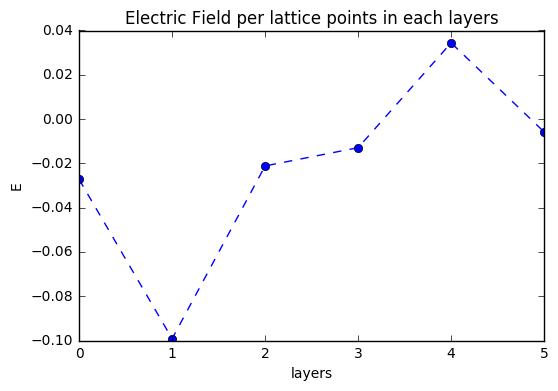

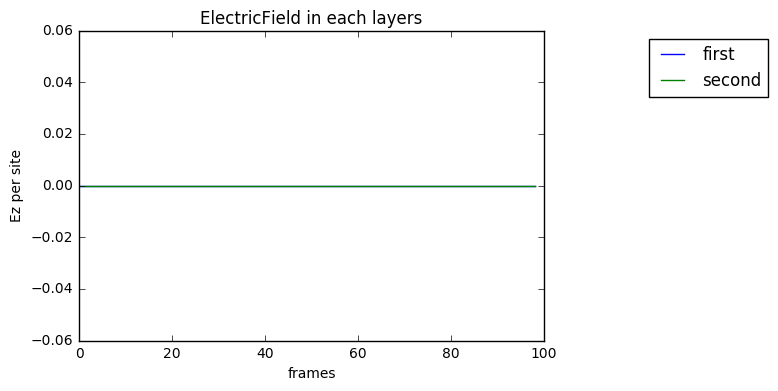

In [90]:
Ex=[]
Ey=[]
Ez=[]
charge=[]
aveZpos=[]
framing=99
for items in range(a.size):
    Ex.append(sum(ex[framing][layer[items][0]])/float(layer[items][0].size))
    Ey.append(sum(ey[framing][layer[items][0]])/float(layer[items][0].size))
    Ez.append(sum(ez[framing][layer[items][0]])/float(layer[items][0].size))
    charge.append(sum(c[framing][layer[items][0]])/float(layer[items][0].size))
    aveZpos.append(sum(z[framing][layer[items][0]])/float(layer[items][0].size))

lab.plot(range(len(layer)),Ez,'o--')
lab.title("Electric Field per lattice points in each layers")
lab.xlabel("layers")
lab.ylabel("E")
#lab.ylim([0,2e3])
#lab.savefig("/home/hbhattar/afs/Hemanta/metals/MetalsCrystals/plateBuilder/E_SL_LC.eps")
lab.show()

lab.plot(num.sum(pez[:framing,0:900],axis=1)/900,label="first")
lab.plot(num.sum(pez[:framing,900:1800],axis=1)/900,label="second")
lgd=lab.legend(bbox_to_anchor=(1.5,1),loc="upper right")
lab.xlabel("frames")
lab.ylabel("Ez per site")
lab.title("ElectricField in each layers")
#lab.savefig("../MetalsCrystals/PlateSlab_Snider/e-field_on_plates_NFQ.eps")
lab.show()

In [64]:
#-------------------------------------------------------------------------------------------------------------
crange=num.linspace(0,1,num.ceil(len(a)**.33))
colors=[(cr,cb,cg) for cr in crange for cb in crange for cg in crange]


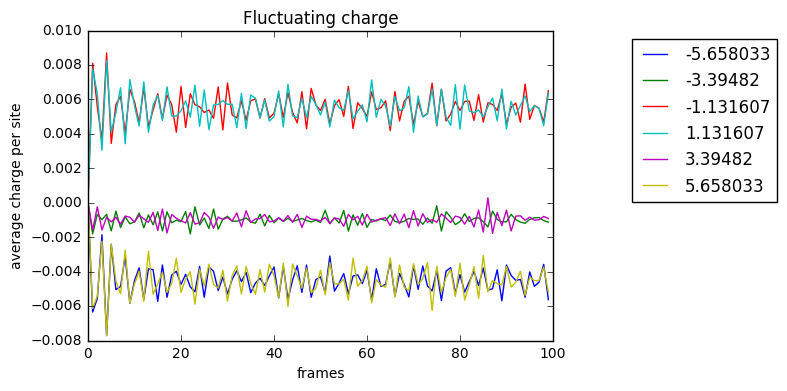

In [91]:
   
#colors=['b--','b', 'g--','g','r--','r','c--','c','m--','m','y--','y'\
 #       , 'k--','k','b-.','g-.','r-.','c-.','m-.','y-.','k-.']

fig = plt.figure(1)
ax = fig.add_subplot(111)
averageChargeLayers=[]
for counter in range(len(a)):
    averageChargeLayers.append(num.sum(c[:,layer[counter][0]],axis=1)/float(len(layer[counter][0])))
    lab.plot(num.sum(c[:,layer[counter][0]],axis=1)/len(layer[counter][0]),color=colors[counter],label=a[counter])
    

    
    
averageChargeLayers=num.array(averageChargeLayers)
handles, labels = ax.get_legend_handles_labels()
lab.xlabel("frames")
lab.ylabel("average charge per site")
lgd=lab.legend(bbox_to_anchor=(1.5,1),loc="upper right")
lab.title("Fluctuating charge")
#lab.savefig("../MetalsCrystals/PlateSlab_Snider/averge_charge_in_slab_4_layers.eps",bbox_extra_artists=(lgd,), bbox_inches='tight')
lab.show()

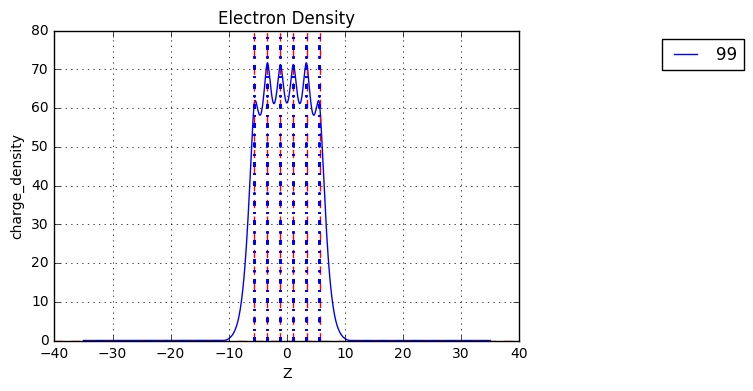

In [66]:
#-------------------------------------------------------------------------------------------------------------
framing=[99]
paramSet="Z"
zlim=35



xx=num.linspace(-2,2,10)
yy=num.linspace(-2,2,10)
xycord=[[x0, y0] for x0 in xx for y0 in yy]
frameForAveraging=framing
AverageDensity=[]
for framing in frameForAveraging:
    R=num.array([x[framing,:-1],y[framing,:-1],z[framing,:-1]])
    allChargeDist=[]
    zz=num.linspace(-zlim,zlim,1000)
    for xy in xycord:
        chargedist=[]
        for var in zz:
            chargedist.append(totalChargeDen(partialCharge(c[framing,:-1]),\
                                             chargeDen(dist(R,xy[0],xy[1],var),paramSet)))
        allChargeDist.append(chargedist)
    allChargeDistMat=num.matrix(allChargeDist)
    averageChargeDistMat=num.sum(allChargeDist,axis=0)/float(len(xycord))
    AverageDensity.append(averageChargeDistMat)
FinalAverageDensity=num.sum(num.matrix(AverageDensity),axis=0)/float(len(frameForAveraging))

lab.plot(zz,averageChargeDistMat,label=str(framing))
for points in a:
    lab.axvline(points,linestyle="--",color="red")
lab.axhline(0,linestyle="--",color="red")
for var in z[framing][:-1]:
    lab.axvline(var,linestyle="-.")

lgd=lab.legend(bbox_to_anchor=(1.5,1),loc="upper right")
lab.grid()
lab.xlabel("Z")
lab.ylabel("charge_density")
lab.title("Electron Density")
lab.show()

In [80]:
chargeDistE0=averageChargeDistMat

In [26]:
chargeDistE1=averageChargeDistMat

In [48]:
diff=chargeDistE1-chargeDistE0

In [245]:
lab.plot(zz,diff)
lab.xticks(list(a))
lab.grid()
for points in a:
    lab.axvline(points,linestyle="--",color="red")
lab.axhline(0,linestyle="--",color="red")
for var in z[30][:-1]:
    lab.axvline(var,linestyle="--")
lab.xlabel("z")
lab.ylabel(r'$\rho(FQ)-\rho(NFQ)$')
lab.title(r'$\Delta\rho$---1Run')
#lab.savefig("/home/hbhattar/afs/Hemanta/metals/MetalsCrystals/PlateSlab_Snider/chargeDistFQ-NFQ-1Run.eps")
lab.show()

NameError: name 'diff' is not defined

In [25]:
a


array([-4.503332, -2.251666,  0.      ,  2.251666,  4.503332])

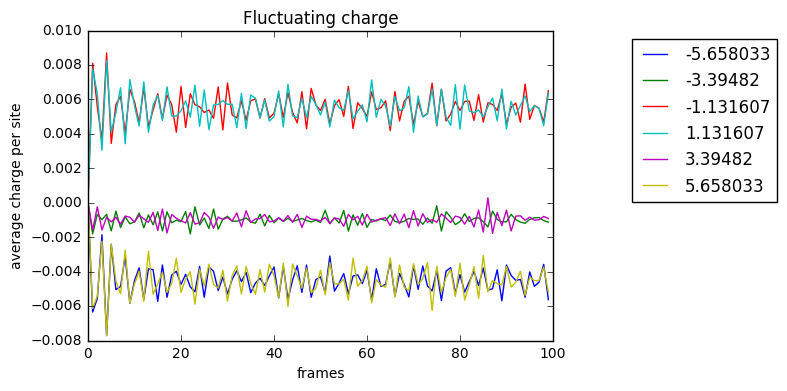

In [92]:
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', '--','-.']
fig = plt.figure(1)
ax = fig.add_subplot(111)

for counter in range(len(a)):
    lab.plot(num.sum(c[:,layer[counter][0]],axis=1)/len(layer[counter][0]),colors[counter],label=a[counter])
    

handles, labels = ax.get_legend_handles_labels()
lab.xlabel("frames")
lab.ylabel("average charge per site")
lgd=lab.legend(bbox_to_anchor=(1.5,1),loc="upper right")
lab.title("Fluctuating charge")
#lab.savefig("../MetalsCrystals/PlateSlab_Snider/averge_charge_in_slab_4_layers.eps",bbox_extra_artists=(lgd,), bbox_inches='tight')
lab.show()


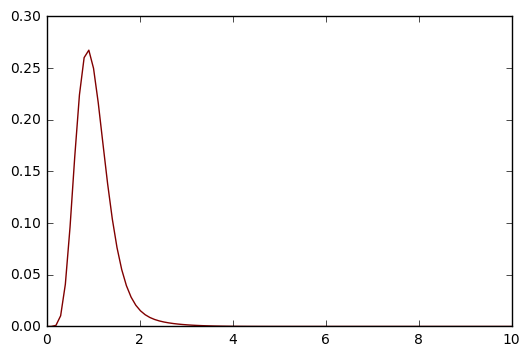

In [59]:
rho=pan.read_csv("Pt_u3.rho.dat",sep="\t",names=["r","rho"])
RhoF=pan.DataFrame(rho)
RFunc=sci.interp(2,RhoF.r,RhoF.rho)
#lab.plot(RhoF.r,RFunc(RhoF.r))
x=num.linspace(0,10,100)
Rfunc=sci.interp(x,RhoF.r,RhoF.rho)
lab.plot(x,Rfunc,color=colors[9])

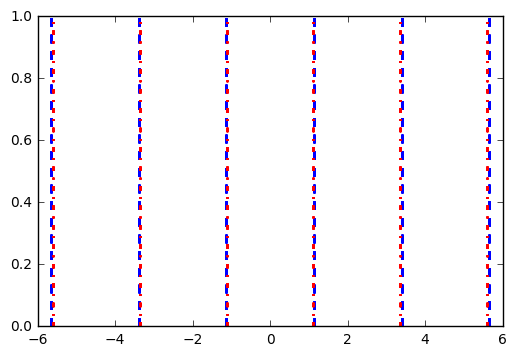

In [95]:
for var in z[0][:-1]:
    lab.axvline(var,linestyle="--",color="blue")


for var in z[99][:-1]:
    lab.axvline(var,linestyle="-.",color="red")







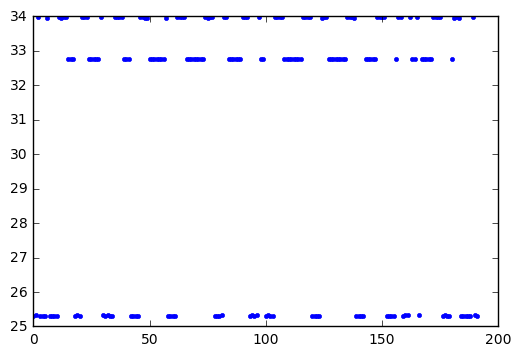

In [70]:
lab.plot(d[1,:-1],".")
#lab.ylim([33.6,33.8])

In [259]:
d[1,:-1].shape

(4032,)

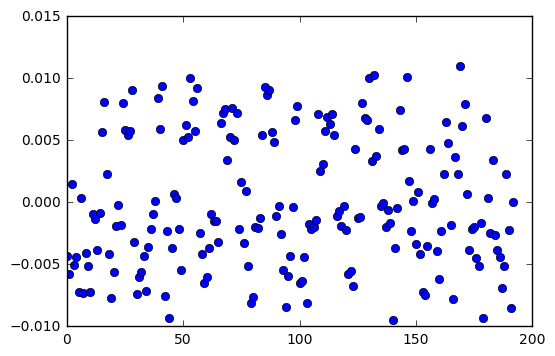

In [71]:
lab.plot(c[:][99],'o')

In [25]:
track

2

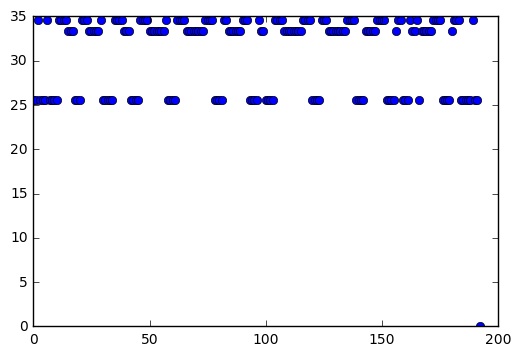

In [72]:
lab.plot(d[:][9],"o")

In [74]:
len(chargedist)

1000

In [73]:
framing=0
paramSet="Z"
chargedist=[]
R=num.array([x[framing,:-1],y[framing,:-1],z[framing,:-1]])
for count in range(R.shape[1]):
    chargedist.append(num.sum(chargeDen(dist(R,R[0][count],R[1][count],R[2][count]),paramSet))-100)
                      
        



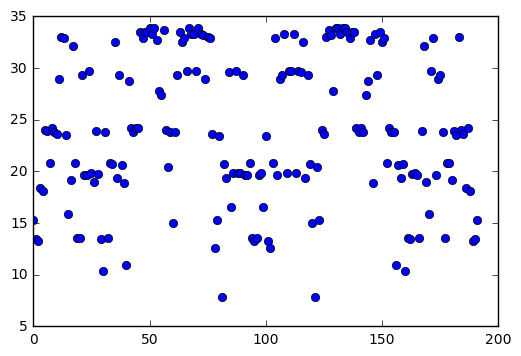

In [74]:
lab.plot(chargedist,"o")


In [172]:
d[0][0]

24.461449999999999

In [179]:
num.sum(totalChargeDen(partialCharge(c[0][0]),chargeDen(dist(R,R[0][0],R[1][0],R[2][0]),paramSet)))-100

16.220491206251808

In [76]:
R=num.array([x[0,:-1],y[0,:-1],z[0,:-1]])
nei=[]
for count in range(R.shape[1]):
    nei.append(num.sum(num.logical_and((dist(R,R[0][count],R[1][count],R[2][count])>2.77)\
                                       ,(dist(R,R[0][count],R[1][count],R[2][count])<2.78))*1))

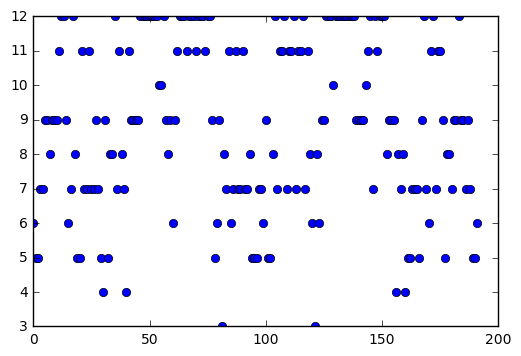

In [77]:
lab.plot(nei,"o")

In [18]:
len(a)

24

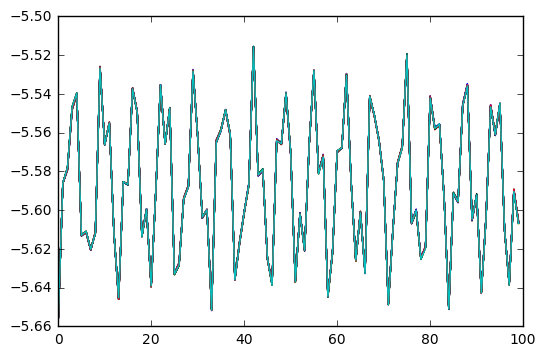

In [78]:
lab.plot(z[:,layer[0][0]])
lab.show()

In [79]:
averageChargeLayers[:,99]

array([-0.00562824, -0.00112676,  0.00650166,  0.00635685, -0.00091484,
       -0.00518868])

In [80]:

diff=[]
precharge=0
prez=0
for counter in range(len(charge)):
    diff.append((charge[counter]-precharge)*(aveZpos[counter]-prez))
    precharge=charge[counter]
    prez=aveZpos[counter]

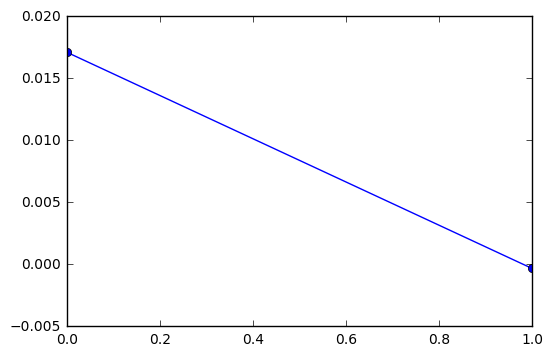

In [81]:
lab.plot(diff[2:-2],"o-")

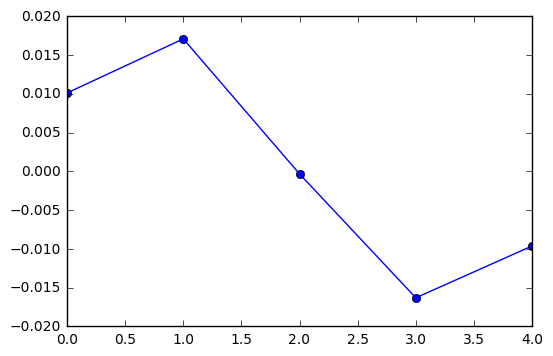

In [82]:
lab.plot(diff[1:],"o-")

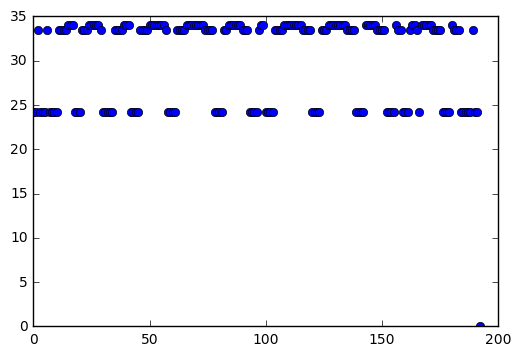

In [93]:
lab.plot(d[99,:],"o")
lab.show()

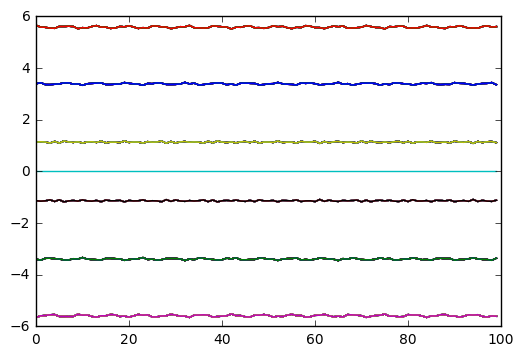

In [94]:
lab.plot(z)
lab.show()

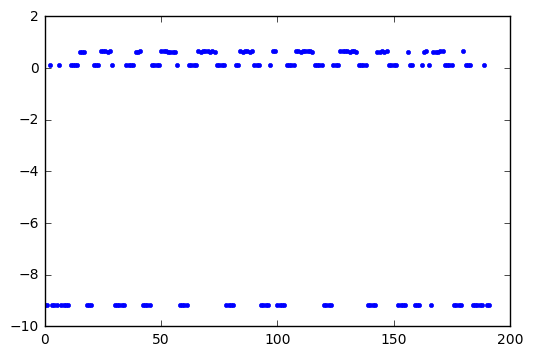

In [85]:
f=d[99,:]-33.36
lab.plot(f[:-1],".")

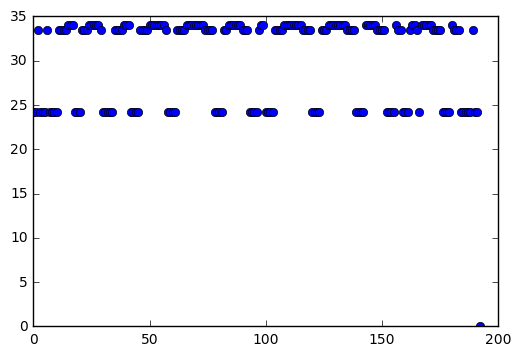

In [86]:
lab.plot(d[99,:],"o")

In [55]:
d[99,:-1]

array([ 24.19409,  24.1956 ,  33.47411,  24.18651,  24.18371,  24.18963,
        33.46604,  24.18442,  24.19004,  24.18183,  24.1887 ,  33.48271,
        33.47593,  33.4771 ,  33.47009,  33.99905,  33.99504,  33.99773,
        24.19046,  24.18053,  24.18581,  33.47552,  33.48061,  33.48121,
        34.01217,  34.01228,  34.00383,  34.00122,  34.01021,  33.46957,
        24.18585,  24.19558,  24.19372,  24.19142,  24.19436,  33.46934,
        33.47891,  33.48279,  33.46946,  34.00102,  33.99936,  34.00406,
        24.18066,  24.19105,  24.19675,  24.18716,  33.47193,  33.47852,
        33.46644,  33.47415,  34.00343,  34.00306,  34.00376,  33.99996,
        33.99509,  33.99752,  33.99669,  33.468  ,  24.19073,  24.19133,
        24.18801,  24.19333,  33.47769,  33.47783,  33.47739,  33.46624,
        34.0078 ,  34.0028 ,  34.00678,  34.00491,  34.00738,  34.00298,
        34.00781,  33.99919,  33.47437,  33.46171,  33.46237,  33.47237,
        24.18679,  24.18666,  24.18355,  24.18901, 

In [57]:
c[99,:]

array([ -4.32237700e-03,  -5.78957100e-03,   1.45817000e-03,
        -5.00669500e-03,  -4.43816600e-03,  -7.21385100e-03,
         3.37530900e-04,  -7.31139600e-03,  -4.08367300e-03,
        -5.16161500e-03,  -7.22162300e-03,  -9.54888300e-04,
        -1.36027700e-03,  -3.80614500e-03,  -8.31939100e-04,
         5.66030700e-03,   8.13370500e-03,   2.27862700e-03,
        -4.17804500e-03,  -7.69465400e-03,  -5.57054300e-03,
        -1.93024400e-03,  -2.22829000e-04,  -1.80361700e-03,
         8.01681900e-03,   5.84243800e-03,   5.40764600e-03,
         5.78887500e-03,   9.10688200e-03,  -3.20117100e-03,
        -7.40438400e-03,  -6.01500400e-03,  -5.61175600e-03,
        -4.34863300e-03,  -7.13898700e-03,  -3.62958600e-03,
        -2.13272800e-03,  -8.95188400e-04,   1.23352800e-04,
         8.41640200e-03,   5.94337000e-03,   9.38400300e-03,
        -7.52702500e-03,  -2.32126100e-03,  -9.30712400e-03,
        -3.68722600e-03,   6.56386300e-04,   3.53496500e-04,
        -2.11363900e-03,